<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 1 - Simple and Multiple Linear Regression</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement, test and evaluate two linear regression models- Simple Linear Regression and Multiple Linear Regression.**



**Guidelines**

* Make sure to run all the code cells, otherwise you may get errors like NameError for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as IPYNB file and submit to D2L `Lab 1 - Simple and Multiple Linear Regression (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Simple Linear Regression
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `House Prices.csv` file into a dataset and perform the following:

> **Q1.1.** Visualize the dataset

> **Q1.2.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q1.3.** Fit a regression model to predict the house `price` based on the house `square_footage` 

> **Q1.4.** Evaluate and discuss the model goodness of fit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('House Prices.csv')

In [3]:
dataset.head(10)

,square_footage,price
0,1932.65,66690.35
1,4340.14,111116.52
2,3464.18,83877.06
3,3487.12,81352.80
4,3067.75,96720.25
5,1935.86,66420.62
6,2891.17,81435.23
7,2203.01,86729.19
8,3512.30,118094.00
9,3890.66,103916.88


**Q1.1. Visualize the dataset**

In [4]:
x = dataset.iloc[:, :-1].values  #independent variable array
y = dataset.iloc[:,1].values  #dependent variable array

Text(0, 0.5, 'House Price')

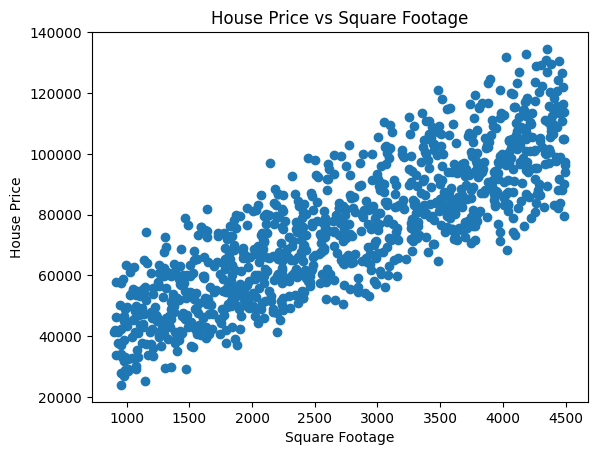

In [5]:
# Visualizing the dataset
plt.scatter(x, y) 
plt.title("House Price vs Square Footage")
  
plt.xlabel("Square Footage") 
plt.ylabel("House Price") 

**Q1.2. Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability**

In [6]:
dataset.describe()

,square_footage,price
count,1000.000000,1000.00000
mean,2719.612890,75086.47110
std,1043.140412,22526.24462
min,902.430000,23919.44000
25%,1840.417500,57493.73000
50%,2695.180000,74970.70000
75%,3639.622500,91349.24750
max,4498.680000,134557.20000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   square_footage  1000 non-null   float64
 1   price           1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


**Answer:** The dataset consists of two variables (square footage and price). After constructing the scatter plot diagram, we can infer that they are positively correlated i.e. when the value of square footage increases then the value of price also increases and vice versa.

As per the summary data obtained from the command dataset.describe() and dataset.info(), there exist 1000 rows for both square footage and price column, both having float data type and 1000 (i.e. all) non-null data. The mean value of square footage is 2719.61289 and the mean value of the price is 75086.4711. The minimum and maximum value that exists in the square footage column are 902.43 and 4498.68 respectively whereas the minimum and maximum values that exist in the price column are 23919.44 and 134557.2 respectively. 

The mean value for both the columns is greater than their respective median values. This indicated that the distribution of the data is positively skewed. Also, these variables have the standard deviation value of 1043.140412 and 22526.24462 which indicates the level of dispersion from their mean value.

**Q1.3. Fit a regression model to predict the house price based on the house square_footage**

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [10]:
# Predicting the test set results
y_pred = regressor.predict(x_test) 
y_pred

array([ 72327.40783626,  52304.70655314,  66941.81105543,  74694.15488751,
        46453.47378495,  81379.35727743,  45693.98469159,  77837.72854228,
        52567.06907945,  63091.99923138,  54726.47366216,  84412.00624981,
        55228.1999768 ,  70364.90783332,  80758.0375253 ,  70146.24290916,
        54438.98943744,  99416.2059929 , 105635.59548209,  74045.23664981,
        81840.39351719,  58818.30297508,  69834.52155288,  48091.86849578,
       102585.43208618,  94790.8059589 ,  57855.3635073 ,  79540.16589272,
        65903.68340581, 103114.04923292,  48545.29746068,  54403.783677  ,
        63723.57995892,  89932.7648446 ,  61814.86162016, 102457.52372035,
       101071.23056042, 104217.10408899,  97535.79379319,  56954.8744588 ,
        78480.10098533,  95462.36910784, 103641.07415934,  76748.472929  ,
        67855.21477987,  49971.04230191,  61042.98859097,  47426.14348802,
        80865.60085369,  46378.46251647,  72024.35523507,  91551.69908484,
        68726.51312248,  

In [11]:
y_test

array([ 91842.67,  78992.  ,  58219.65,  63595.65,  54085.2 ,  71739.21,
        47020.68,  84334.6 ,  45689.62,  51002.3 ,  59919.8 ,  84798.15,
        43022.2 ,  66174.  ,  83205.05,  77291.16,  75919.8 , 103984.04,
       116563.4 ,  83875.54,  82603.05,  62980.6 ,  59889.3 ,  46870.4 ,
       122402.2 , 101921.72,  62233.4 ,  67421.71,  65146.28, 111116.52,
        39617.75,  40588.8 ,  65977.6 ,  74772.05,  81070.2 , 129219.6 ,
       109840.4 , 109727.8 ,  86716.45,  72887.  ,  75245.65, 106178.97,
       115719.67,  89545.94,  77600.66,  46674.08,  76672.44,  47890.02,
        78447.35,  43120.72,  77813.6 ,  96863.44,  54771.24,  80540.9 ,
        55938.6 , 105743.35,  79042.4 ,  77849.88,  59901.13,  60686.  ,
        68257.67,  61937.46,  48888.53,  76690.  ,  41275.74,  80417.68,
        54814.8 , 107799.8 ,  60171.17,  65624.15,  50709.96,  71591.12,
        76171.4 ,  98812.49,  97488.  ,  92767.6 ,  85501.04,  92987.08,
        61873.87,  79197.84,  91794.4 ,  71404.6 , 

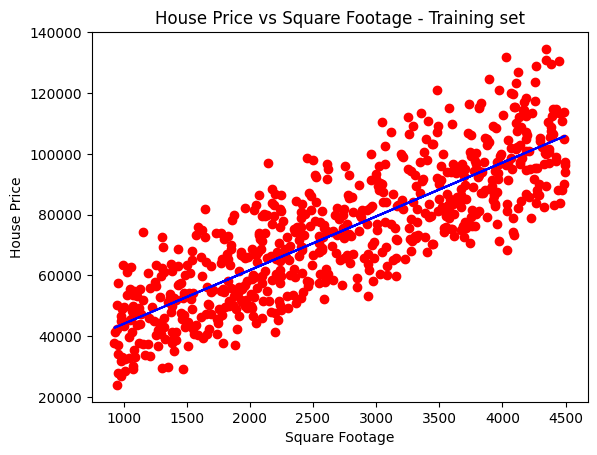

In [12]:
# Visualizing the results for training data
plt.scatter(x_train, y_train, color='red') # plotting the observation line
plt.plot(x_train, regressor.predict(x_train), color='blue') # plotting the regression line
plt.title("House Price vs Square Footage - Training set")

plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.show()

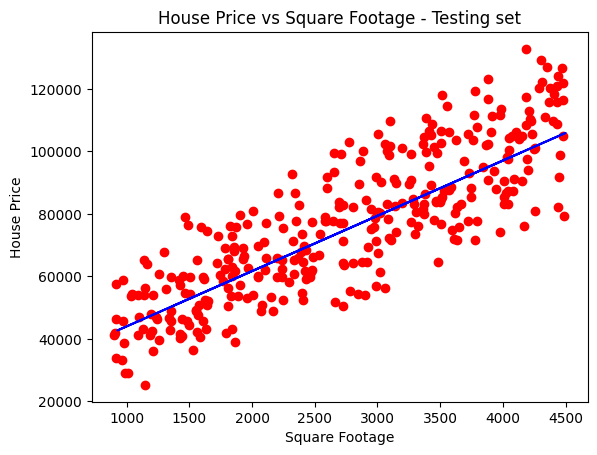

In [13]:
# Visualizing the results for test data
plt.scatter(x_test, y_test, color='red') # plotting the observation line
plt.plot(x_train, regressor.predict(x_train), color='blue') # plotting the regression line
plt.title("House Price vs Square Footage - Testing set")

plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.show()

**Q1.4. Evaluate and discuss the model goodness of fit**

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6955961426910144

**Answer:** An R-squared value of 0.6955961426910144 indicates that our linear regression model explains approximately 69.55% of the variance in the dependent variable i.e. house price. This suggests a relatively strong fit, indicating that the model captures a substantial portion of the underlying patterns in the data. The remaining 30.45% of the variance in the dependent variable i.e. house price is unexplained by the model and is represented by the residuals.

# Question 2: Multiple Linear Regression
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `Car Prices.csv` file and perform the following:

> **Q2.1.** Preprocess and clean the dataset: This step should include the following:

        - Dealing with the missing data
        - Dealing with the irregular data (outliers)
        - Dealing with the unnecessary data
        - Dealing with the inconsistent data
        - Encoding categorical data 

> **Q2.2.** Visualize the dataset

> **Q2.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q2.4.** Fit a regression model to predict the car `price` based on the other features in the dataset 

> **Q2.5.** Evaluate and discuss the model goodness of fit

In [15]:
cars = pd.read_csv('Car Prices.csv')

In [16]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
cars.shape

(205, 26)

**Q2.1.1. Dealing with the missing data**

In [18]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [19]:
missing_data = cars.isnull().sum()
missing_data

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Answer: No any missing data**

In [20]:
# If there were any missing data, we need to drop them using following command:
cars = cars.dropna()

**Q2.1.2. Dealing with the irregular data (outliers)**

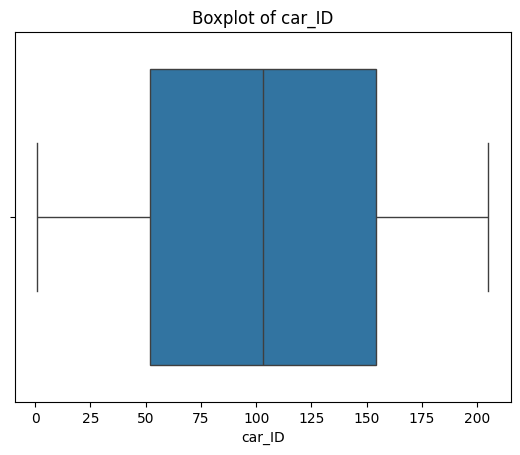

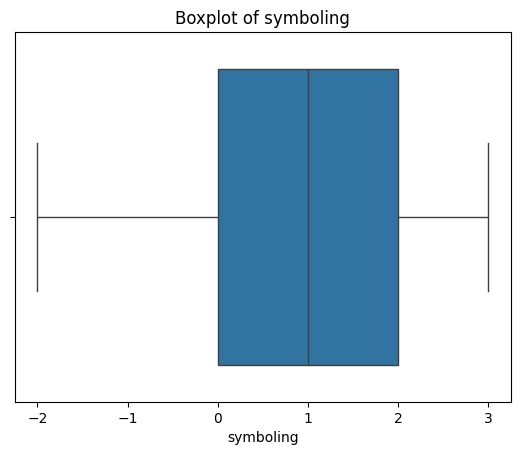


Unique values for CarName column: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'


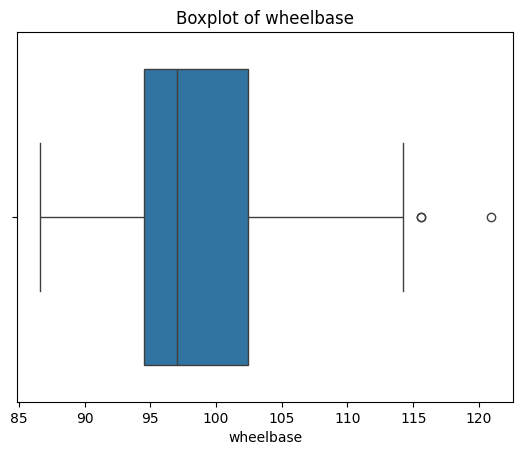

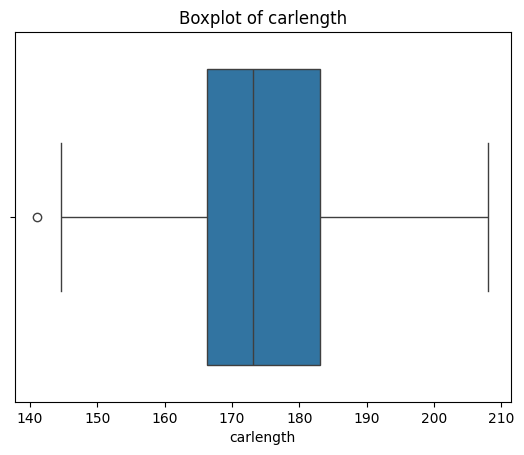

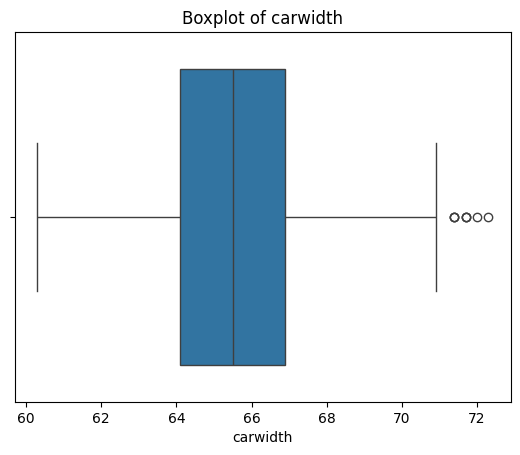

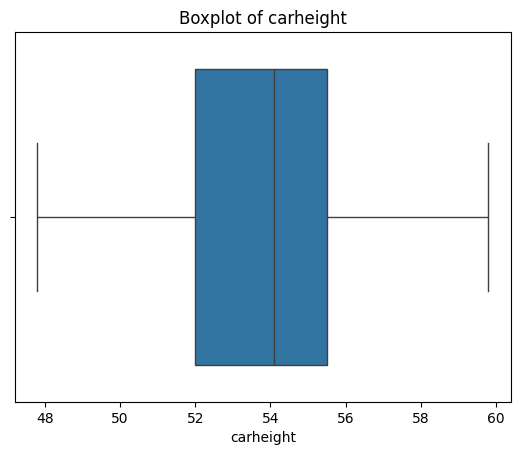

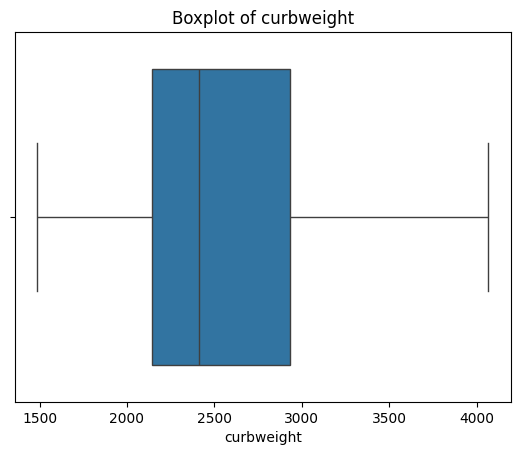


Unique values for enginetype column: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

Unique values for cylindernumber column: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


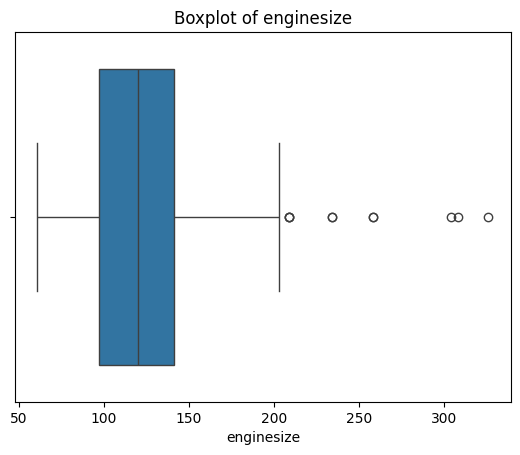


Unique values for fuelsystem column: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


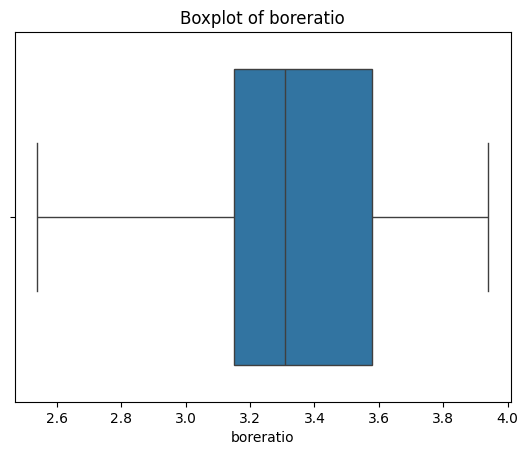

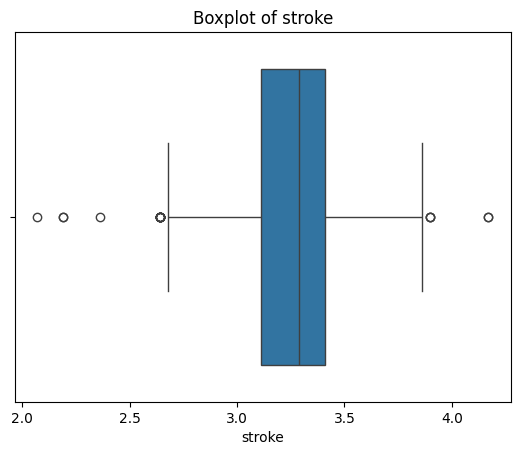

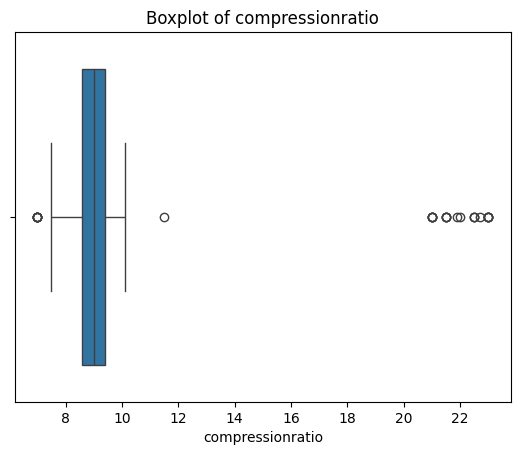

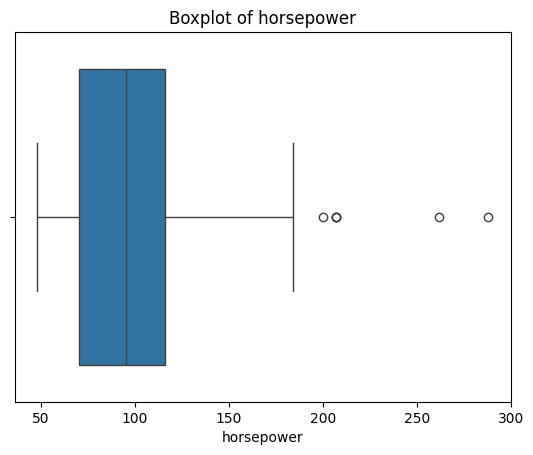

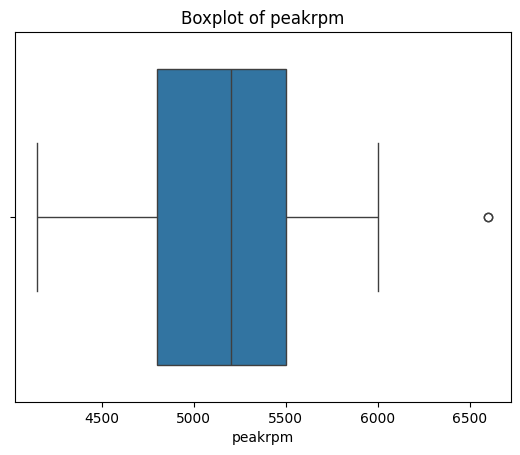

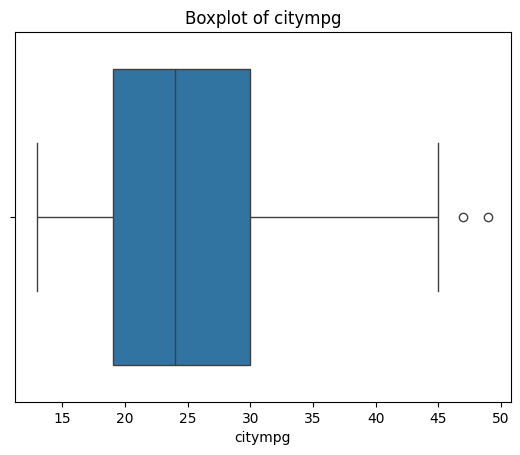

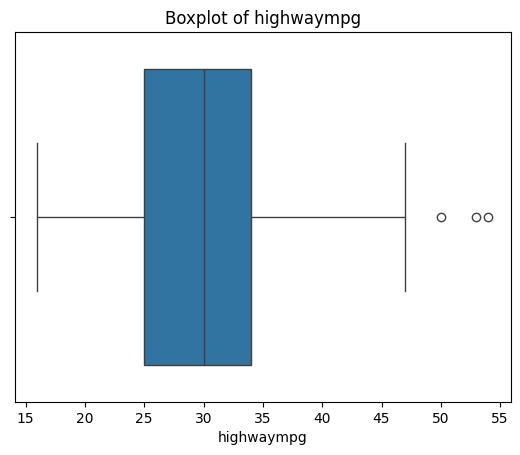

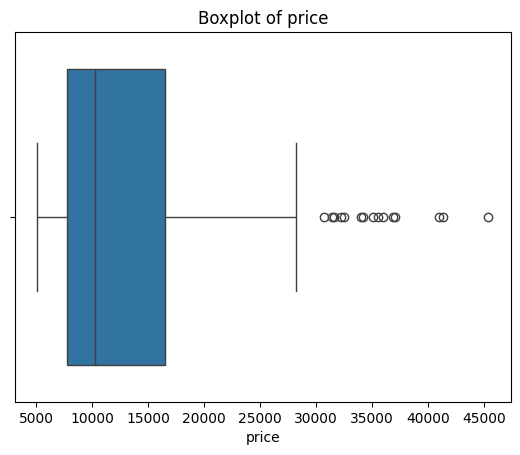

In [21]:
for column in cars.columns:
    if cars[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        sns.boxplot(x=cars[column])
        plt.title(f'Boxplot of {column}')
        plt.show()
    else:
        print('\nUnique values for', column, 'column:', cars[column].unique())

In [22]:
# Remove outliers for numeric data using Isolation Forest
from sklearn.ensemble import IsolationForest
numeric_columns = cars.select_dtypes(include=['int64', 'float64']).columns
iso_forest = IsolationForest(contamination=0.05)
outlier_mask = iso_forest.fit_predict(cars[numeric_columns])
cars = cars[outlier_mask != -1]

In [23]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            194 non-null    int64  
 1   symboling         194 non-null    int64  
 2   CarName           194 non-null    object 
 3   fueltype          194 non-null    object 
 4   aspiration        194 non-null    object 
 5   doornumber        194 non-null    object 
 6   carbody           194 non-null    object 
 7   drivewheel        194 non-null    object 
 8   enginelocation    194 non-null    object 
 9   wheelbase         194 non-null    float64
 10  carlength         194 non-null    float64
 11  carwidth          194 non-null    float64
 12  carheight         194 non-null    float64
 13  curbweight        194 non-null    int64  
 14  enginetype        194 non-null    object 
 15  cylindernumber    194 non-null    object 
 16  enginesize        194 non-null    int64  
 17  fu

**Answer:** There are now 194 rows i.e. 205 - 194 = 11 outliers have been removed.

**Q2.1.3. Dealing with the unnecessary data**

In [24]:
# Check column names and types
print(cars.info())

# Inspect unique values in each column
for column in cars.columns:
    print(column, cars[column].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            194 non-null    int64  
 1   symboling         194 non-null    int64  
 2   CarName           194 non-null    object 
 3   fueltype          194 non-null    object 
 4   aspiration        194 non-null    object 
 5   doornumber        194 non-null    object 
 6   carbody           194 non-null    object 
 7   drivewheel        194 non-null    object 
 8   enginelocation    194 non-null    object 
 9   wheelbase         194 non-null    float64
 10  carlength         194 non-null    float64
 11  carwidth          194 non-null    float64
 12  carheight         194 non-null    float64
 13  curbweight        194 non-null    int64  
 14  enginetype        194 non-null    object 
 15  cylindernumber    194 non-null    object 
 16  enginesize        194 non-null    int64  
 17  fu

**Answer:** After observing the above data, the column car_id does not seem to provide any importance in predicting the price of the car. It is just the auto increment numbers with all rows having distinct values. Therefore, it is an unnecessary column and we can remove it.

In [25]:
# Drop unnecessary columns
columns_to_drop = ['car_ID']
cars = cars.drop(columns=columns_to_drop)

**Q2.1.4. Dealing with the inconsistent data**

In [26]:
# Check unique values in categorical columns for inconsistencies
for column in cars.select_dtypes(include='object').columns:
    print(column, cars[column].unique())

CarName ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet monte carlo' 'chevrolet vega 2300' 'dodge rampage'
 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic cvcc'
 'honda civic' 'honda accord cvcc' 'honda accord lx' 'honda civic 1500 gl'
 'honda accord' 'honda civic 1300' 'honda prelude' 'honda civic (auto)'
 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross' 'maxda rx3'
 'maxda glc deluxe' 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe'
 'mazda 626' 'mazda glc' 'mazda rx-7 gs' 'mazda glc 4'
 'mazda glc custom l' 'mazda glc custom' 'buick electra 225 custom'
 'buick century luxus (sw)' 'buick century' 'mercury cougar'
 'mitsubishi mirage' 'mitsubishi lancer' 'mitsubishi outlander'
 

**Answer:** After observing the above data, the data values 'audi 100 ls' and 'audi 100ls' seems like it is the same value, but they are being treated inconsistently due to a space value. Therefore, we will construct these values to be the same.

In [27]:
cars['CarName'] = cars['CarName'].replace('audi 100 ls', 'audi 100ls')
cars['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100ls', 'audi fox', 'audi 5000',
       'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3',
       'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet monte carlo',
       'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se',
       'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop',
       'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic cvcc', 'honda civic',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'maxda rx3', 'maxda glc deluxe',
       'mazda rx2 coupe', 'mazda rx-4', 'mazda glc deluxe', 'mazda 626',
       'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l',
       'mazda glc custom', 'buick electra 225 custom',
       

**Q2.1.5. Encoding categorical data**

In [28]:
# Find and Replace
cleanup_nums = {
    "doornumber":{
        "four": 4, 
        "two": 2
    },
    "cylindernumber":{
        "four": 4, 
        "six": 6, 
        "five": 5,
        "three": 3,
        "twelve": 12, 
        "two": 2, 
        "eight": 8
    }}

cars = cars.replace(cleanup_nums)

In [29]:
# Label Encoding
cars['CarName'] = cars['CarName'].astype('category').cat.codes
cars['fueltype'] = cars['fueltype'].astype('category').cat.codes
cars['aspiration'] = cars['aspiration'].astype('category').cat.codes
cars['carbody'] = cars['carbody'].astype('category').cat.codes
cars['drivewheel'] = cars['drivewheel'].astype('category').cat.codes
cars['enginelocation'] = cars['enginelocation'].astype('category').cat.codes
cars['enginetype'] = cars['enginetype'].astype('category').cat.codes
cars['fuelsystem'] = cars['fuelsystem'].astype('category').cat.codes

In [30]:
cars

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,2,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,4,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,1,0,4,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,129,1,0,4,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,128,1,1,4,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,130,1,0,4,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,132,0,1,4,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


**Q2.2. Visualize the dataset**

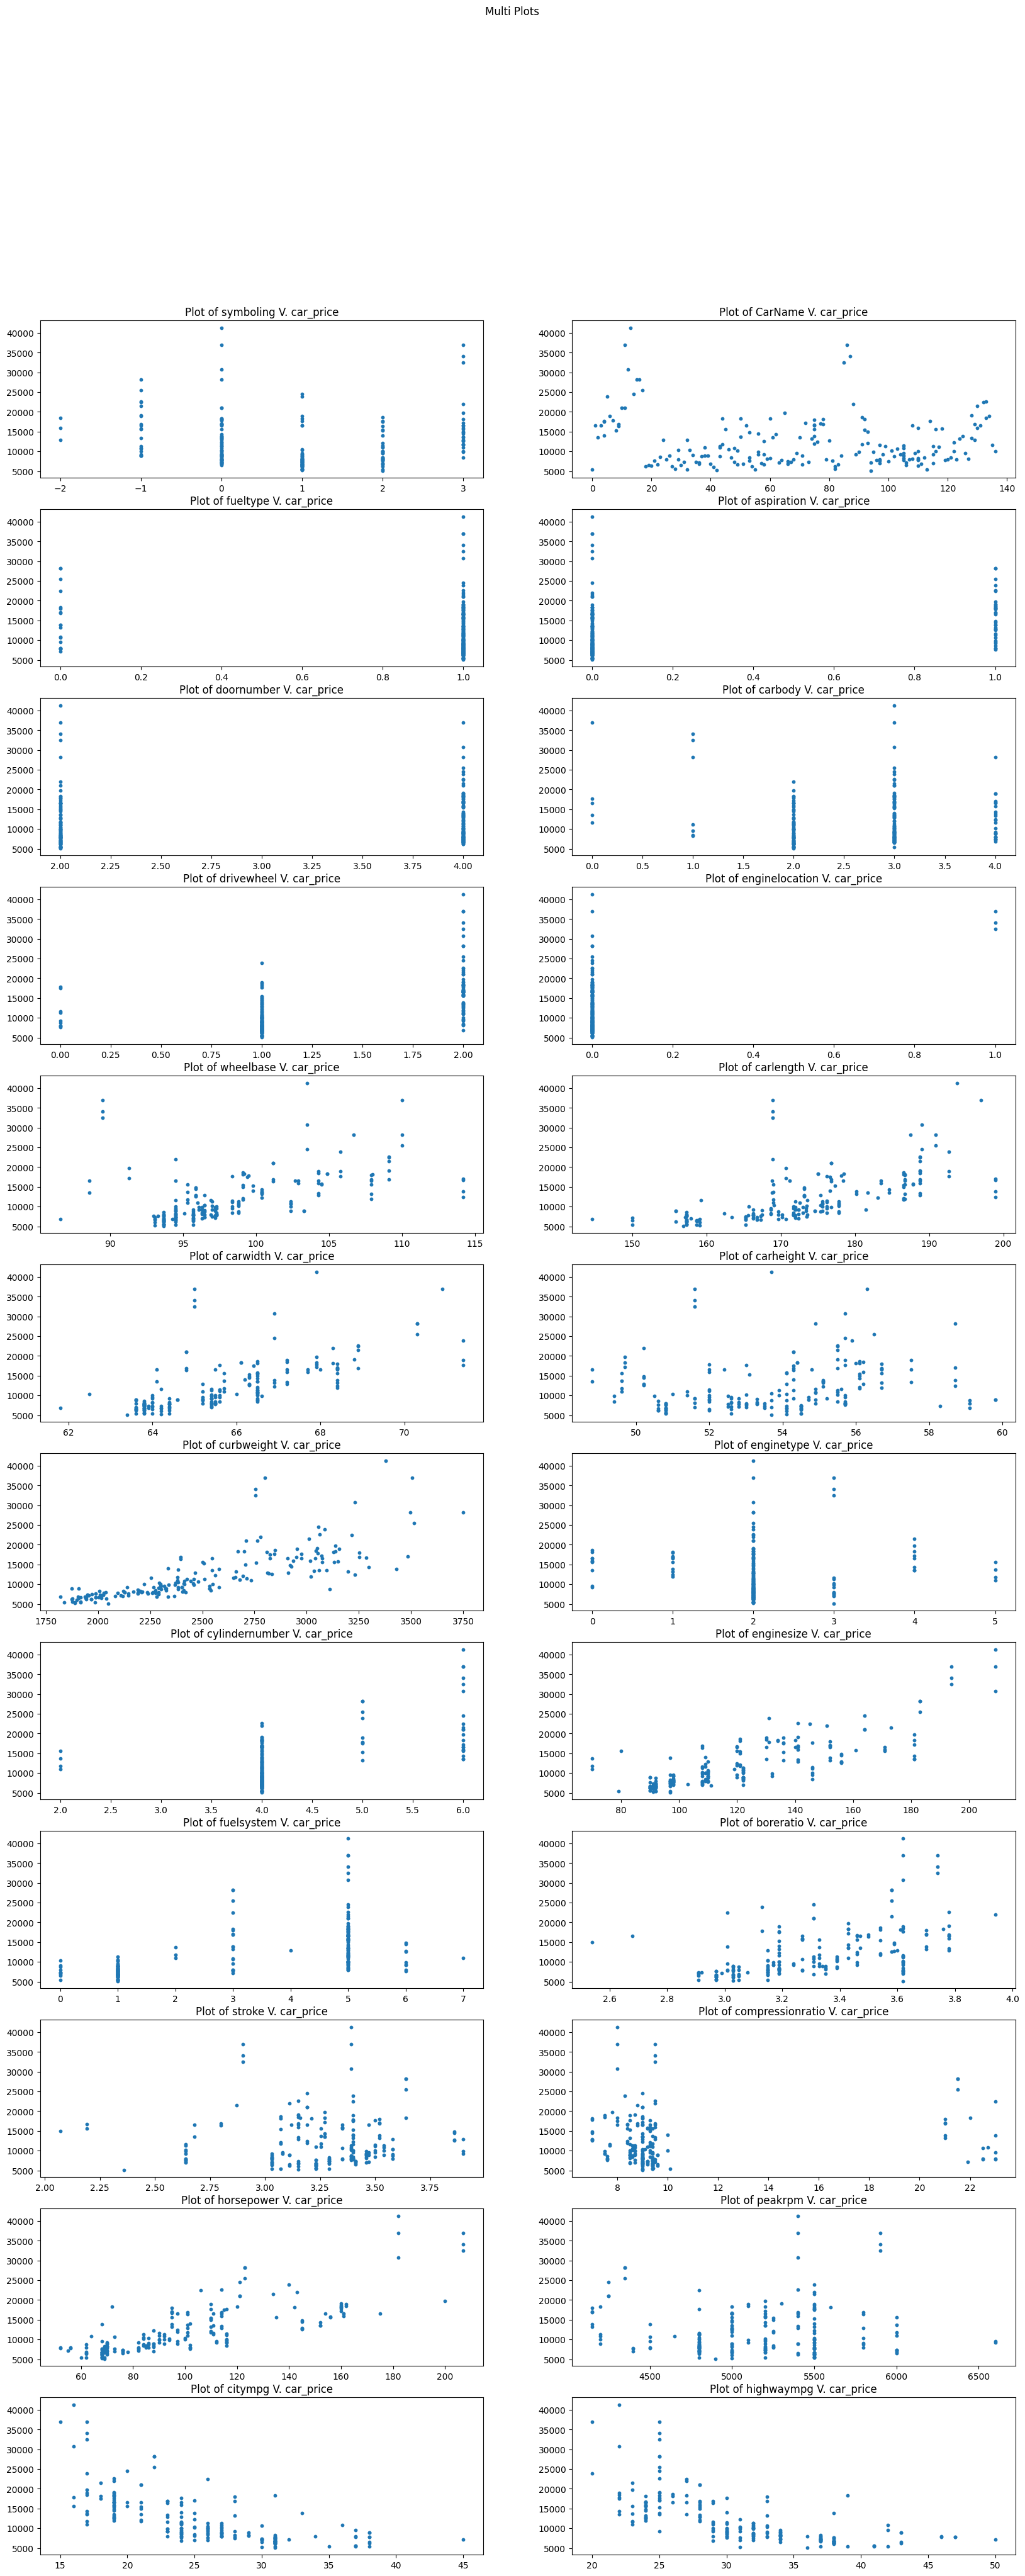

In [31]:
# Visualizing the dataset
num_cols = 2
num_rows = int((cars.shape[1]-1)/num_cols)+1

plt.figure(figsize=(20, 50))
for index, col in enumerate(cars.columns[:-1]):
    x = cars[col].values
    y = cars.iloc[:,-1:].values
    
    plt.subplot(num_rows, num_cols, index+1)
    plt.scatter(x,y, s=10)
    plt.title(f'Plot of {col} V. car_price')

plt.suptitle("Multi Plots")
plt.show()

<Axes: >

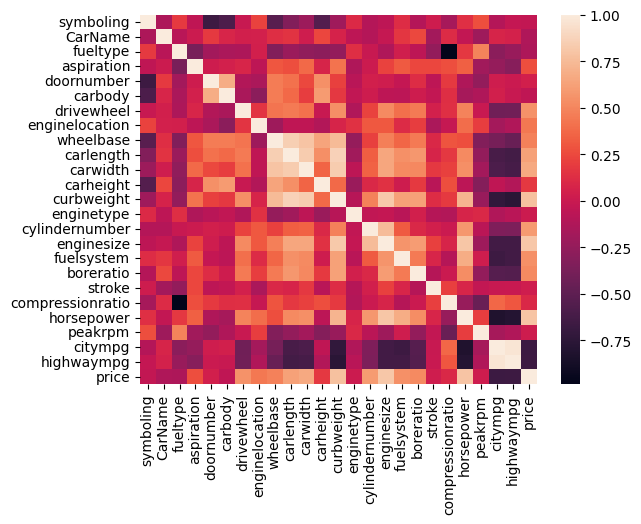

In [32]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(cars.corr())

In [33]:
# Calculate the correlation values of all the column with respect to the car price
correlation_values = cars.corrwith(cars.iloc[:, -1])
correlation_values

symboling          -0.032292
CarName            -0.126405
fueltype           -0.138769
aspiration          0.265376
doornumber          0.039322
carbody            -0.050880
drivewheel          0.551335
enginelocation      0.434234
wheelbase           0.473279
carlength           0.625657
carwidth            0.660303
carheight           0.170654
curbweight          0.776542
enginetype          0.013975
cylindernumber      0.591727
enginesize          0.806617
fuelsystem          0.543914
boreratio           0.517151
stroke              0.022759
compressionratio    0.098413
horsepower          0.791978
peakrpm             0.015490
citympg            -0.672514
highwaympg         -0.660164
price               1.000000
dtype: float64

**Q2.3. Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability**

In [34]:
cars.describe()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.845361,70.927835,0.902062,0.185567,3.134021,2.634021,1.298969,0.015464,98.365979,173.376289,...,121.417526,3.211340,3.319278,3.248299,10.145979,100.695876,5142.525773,25.422680,31.036082,12307.707046
std,1.245429,38.454669,0.298000,0.389763,0.993543,0.848697,0.551305,0.123708,5.318165,11.134708,...,29.879827,2.018483,0.264039,0.303894,3.983548,34.074367,476.910732,5.946802,6.173966,6429.721075
min,-2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,86.600000,144.600000,...,70.000000,0.000000,2.540000,2.070000,7.000000,52.000000,4150.000000,15.000000,20.000000,5118.000000
25%,0.000000,40.250000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,94.500000,166.300000,...,97.000000,1.000000,3.150000,3.112500,8.600000,70.000000,4800.000000,20.000000,25.000000,7778.250000
50%,1.000000,73.500000,1.000000,0.000000,4.000000,3.000000,1.000000,0.000000,96.700000,172.800000,...,110.000000,3.500000,3.310000,3.290000,9.000000,94.500000,5200.000000,25.000000,30.000000,9992.000000
75%,2.000000,105.000000,1.000000,0.000000,4.000000,3.000000,2.000000,0.000000,101.200000,179.775000,...,140.750000,5.000000,3.580000,3.407500,9.400000,116.000000,5500.000000,30.000000,35.500000,15735.000000
max,3.000000,136.000000,1.000000,1.000000,4.000000,4.000000,2.000000,1.000000,114.200000,198.900000,...,209.000000,7.000000,3.940000,3.900000,23.000000,207.000000,6600.000000,45.000000,50.000000,41315.000000


**Answer:** The initial data set consists of 205 rows and 26 columns. The types of data held by the CSV files were int64, float64, and object. During the data cleaning process, we figured that there was no missing data. Therefore, we didn't have to perform any actions to deal with it. However, there exists a lot of irregular data (outliers) for which we used a boxplot to visualize and Isolation Forest to remove it. 11 rows were identified as an outliers and were removed resulting in 194 remaining rows. Moreover, the column 'car_id' does not provide any importance in predicting the price of the car. It is just the auto increment numbers with all rows having distinct values. Therefore, it is an unnecessary column and we removed it. This resulted in 24 remaining columns. Finally, we deal with some of the inconsistent data to make the data values 'audi 100 ls' and 'audi 100ls' consistent.

Also, from the heat map diagram and calculation of correlation, it was clear that the column 'symboling', 'doornumber', 'carbody', 'enginetype', 'stroke', 'compressionration', and 'peakpm' have a low impact on the dependent variable 'price' whereas 'enginesize' and 'horsepower' seem to have the highest impact.

**Q2.4. Fit a regression model to predict the car `price` based on the other features in the dataset**

In [35]:
# Extracting the Independent and Dependent variables
x = cars.iloc[:, :-1]
y = cars.iloc[:, 24].values # 24 because we have dropped one column

In [36]:
x

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,2,1,0,2,0,2,0,88.6,168.8,...,4,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,3,1,0,2,0,2,0,88.6,168.8,...,4,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,1,0,2,2,2,0,94.5,171.2,...,6,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,4,1,0,4,3,1,0,99.8,176.6,...,4,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,4,1,0,4,3,0,0,99.4,176.6,...,5,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,129,1,0,4,3,2,0,109.1,188.8,...,4,141,5,3.78,3.15,9.5,114,5400,23,28
201,-1,128,1,1,4,3,2,0,109.1,188.8,...,4,141,5,3.78,3.15,8.7,160,5300,19,25
202,-1,130,1,0,4,3,2,0,109.1,188.8,...,6,173,5,3.58,2.87,8.8,134,5500,18,23
203,-1,132,0,1,4,3,2,0,109.1,188.8,...,6,145,3,3.01,3.40,23.0,106,4800,26,27


In [37]:
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,  6229.   ,
        6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,  6855.   ,
        5399.   ,  6529.   ,  7129.   ,  7295.   ,  7295.   ,  7895.   ,
        9095.   ,  8845.   , 10295.   , 12945.   , 10345.   ,  6785.   ,
        8916.5  ,  8916.5  , 11048.   ,  5195.   ,  6095.   ,  6795.   ,
        6695.   ,  7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,
        8845.   ,  8495.   , 10595.   , 10245.   , 10795.   , 11245.   ,
       18280.   , 18344.   , 25552.   , 28248.   , 28176.   , 16503.   ,
        5389.   ,  6189.   ,  6669.   ,  7689.   ,  9959.   ,  8499.   ,
       12629.   , 14869.   , 14489.   ,  6989.   ,  8189.   ,  9279.   ,
        9279.   ,  5499.   ,  7099.   ,  6649.   , 

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [39]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [40]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [41]:
y_pred

array([10806.95203759, 15936.08000572, 10708.64475858, 10893.89884311,
       17136.75440612, 10665.9831474 ,  7190.50394556, 16925.10238384,
       12045.73953567, 19139.84924248, 14661.46158167, 20800.1853538 ,
       12423.98249724,  8393.45176648, 13501.3346309 ,  8823.30130832,
        9092.97023774, 13113.15428449,  9868.45360746,  8561.98395442])

In [42]:
y_test

array([ 8921., 13415., 10595.,  8949., 20970.,  8845.,  6295., 18150.,
       10698., 18920., 15250., 15040., 11549.,  8495., 14489.,  7295.,
        9495., 13295., 12290.,  8499.])

**Q2.5. Evaluate and discuss the model goodness of fit**

In [43]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7465759026636712

An R-squared value of 0.7465759026636712 indicates that our linear regression model explains approximately 74.65% of the variance in the dependent variable i.e. car price. This suggests a relatively strong fit, indicating that the model captures a substantial portion of the underlying patterns in the data. The remaining 25.35% of the variance in the dependent variable i.e. car price is unexplained by the model and is represented by the residuals.

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

**Answer:** 
1. This is my first attempt at working on a machine learning task. Even though I had learned about it in theory, applying it practically was both exciting and confusing. I found the process of cleaning the data for multiple linear regression a bit confusing and struggled to figure it out on my own. However, after doing some research and talking to friends who work in this field, I got some helpful ideas for preparing the data. This experience motivated me to dive deeper into the world of machine learning.
2. I have a keen interest in working with data, analyzing it, and uncovering meaningful patterns. Currently, I'm enrolled in a Data Analytics and Visualization course taught by Dr. Husari this semester. Both subjects (ML and Data Analytics) hold significant importance for me to excel in my studies, and engaging in this activity has provided me with a glimpse of what to anticipate in these areas.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit Lab7.ipynb to the **Lab1- Simple and Multiple Linear Regression (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection